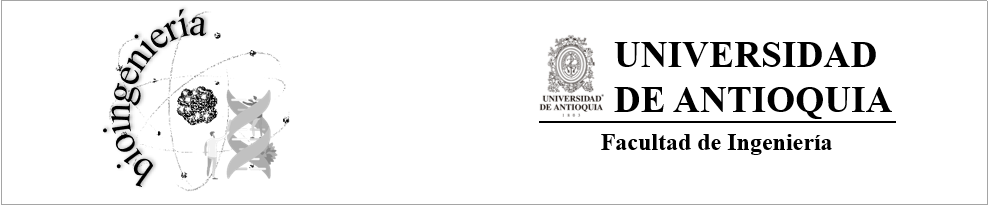

# **PyMongo**

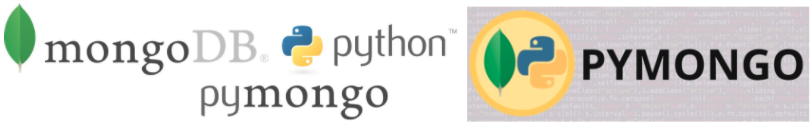

### Desde la página web oficial de MongoDB.
...PyMongo es el controlador (driver) ofiacial de Python para MongoDB. Le recomendamos usar este controlador para trabajar con MongoDB desde Python...

<a href="https://docs.mongodb.com/drivers/pymongo/">mongoDB Web Site</a>

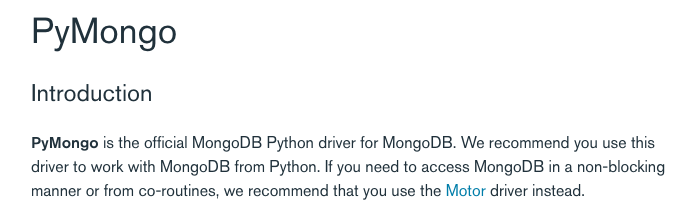

### Instalación de PyMongo
$PyMongo$ es una paquete indexado en los paquetes de Python, por esto se peude instalar con el comando $pip$

In [1]:
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 16.1 MB/s eta 0:00:00


### Sa hace la importación de la librería y el método, clase o funciones a usar

In [2]:
from pymongo import MongoClient

### Primer paso
Crear un objeto $MongoClient$ para correr la instalacia de $mongo$ y establecer la conexión con el servidor

Se puede hacer de dos formas.
1. Usando los argumento del método.

In [3]:
students = MongoClient('localhost', 27017)

o dos, usando la URI de MongoDB

In [4]:
students = MongoClient('mongodb://localhost:27017/')

La variable $client$ hará de puente entre el cliente y el servidor

In [5]:
db = students.prueba

Dado el caso que el nombre de la base de datos tenga un nombre con guión medio o espacios, se puede usar el estido de indexación de diccionarios en python

In [6]:
db2 = students['university']

### Insertando con $insert\_one()$

In [7]:
estudiante = {
    "_id" : 22,
    "nombre" : "Pedro Fernández",
    "universidad" : "UdeA",
    "carrera" : "Bioingeniería",
    "semestre" : "2025-1"
}
db2['university'].insert_one(estudiante)
# En la consola de mongodb la instrucción es insertOne
# En el API de Pymongo se usa el método insert_one o insert_many

InsertOneResult(22, acknowledged=True)

Visualizando los datos

In [8]:
for i in db2['university'].find():
    print(i)

{'_id': 22, 'nombre': 'Pedro Fernández', 'universidad': 'UdeA', 'carrera': 'Bioingeniería', 'semestre': '2025-1'}


In [9]:
i['carrera']

'Bioingeniería'

In [10]:
for i in db.students.prueba.find():
    print(i)

### Insertando con $insert\_many()$

In [11]:
estudiantes = [{
    "_id" : 23,
    "nombre" : "Maria Camila Ortiz",
    "universidad" : "UdeA",
    "carrera" : "Ingeniería Industrial",
    "semestre" : "2025-1"
},
{
    "_id" : 24,
    "nombre" : "Mateo Martínez",
    "universidad" : "UdeA",
    "carrera" : "Sociología",
    "semestre" : "2025-1"
}]
db2['university'].insert_many(estudiantes)

InsertManyResult([23, 24], acknowledged=True)

Visualizando los datos

In [12]:
for i in db2['university'].find():
    print(i)

{'_id': 22, 'nombre': 'Pedro Fernández', 'universidad': 'UdeA', 'carrera': 'Bioingeniería', 'semestre': '2025-1'}
{'_id': 23, 'nombre': 'Maria Camila Ortiz', 'universidad': 'UdeA', 'carrera': 'Ingeniería Industrial', 'semestre': '2025-1'}
{'_id': 24, 'nombre': 'Mateo Martínez', 'universidad': 'UdeA', 'carrera': 'Sociología', 'semestre': '2025-1'}


Insertando un documento sin $"\_id"$

In [13]:
# en este caso no hay _id
estudiante = {
    "nombre" : "Laura María Mesa",
    "universidad" : "UdeA",
    "carrera" : "Trabajo social",
    "semestre" : "2025-1"
}
db2['university'].insert_one(estudiante)

InsertOneResult(ObjectId('67f80af5ae73a6af96f6c87d'), acknowledged=True)

In [14]:
for i in db2['university'].find():
    print(i)

{'_id': 22, 'nombre': 'Pedro Fernández', 'universidad': 'UdeA', 'carrera': 'Bioingeniería', 'semestre': '2025-1'}
{'_id': 23, 'nombre': 'Maria Camila Ortiz', 'universidad': 'UdeA', 'carrera': 'Ingeniería Industrial', 'semestre': '2025-1'}
{'_id': 24, 'nombre': 'Mateo Martínez', 'universidad': 'UdeA', 'carrera': 'Sociología', 'semestre': '2025-1'}
{'_id': ObjectId('67f80af5ae73a6af96f6c87d'), 'nombre': 'Laura María Mesa', 'universidad': 'UdeA', 'carrera': 'Trabajo social', 'semestre': '2025-1'}


## Volviendo a la base de datos anterior $db.prueba()$

In [15]:
estudiante = [{
    "_id" : 2,
    "name" : "Maria Camila Ortiz",
    "universidad" : "UdeA",
    "carrera" : "Ingeniería Industrial",
    "semestre" : "2025-1"
},
{
    "_id" : 3,
    "name" : "Mateo Martínez",
    'age': 44.0,
    "universidad" : "UdeA",
    "carrera" : "Sociología",
    "semestre" : "2025-1"
},
{
    "_id" : 4,
    "name" : "Manuela Beltrán",
    "universidad" : "UdeA",
    "carrera" : "Ingeniería Eléctrica",
    'age': 31.0,
    "semestre" : "2025-1"
},
{
    "_id" : 5,
    "name" : "Mauricio Ortiz",
    "universidad" : "UdeA",
    "carrera" : "Idiomas",
    "semestre" : "2025-1",
    'age': 36.0
},
{
    "_id" : 6,
    "name" : "Karla Buitrago",
    "universidad" : "UdeA",
    "carrera" : "Ingeniería Química",
    'age': 19.0,
    "semestre" : "2025-1"
},
{
    "_id" : 7,
    "name" : "Juana Marcela Oquendo",
    "universidad" : "UdeA",
    "carrera" : "Filosofía",
    "semestre" : "2025-1",
    'age': 18.0
}]
db.prueba.insert_many(estudiante)

InsertManyResult([2, 3, 4, 5, 6, 7], acknowledged=True)

### Buscar todos los documentos $find()$

In [16]:
nom = input('Nombre: ')
uni = input('Universidad: ')
car = input('Carrera: ')
sem = input('Semestre: ')
edad = int(input('Edad: '))

db.prueba.insert_one({
    #"_id" : 7,
    "name" : nom,
    "universidad" : uni,
    "carrera" : car,
    "semestre" : sem,
    'age': edad,
    "profession" : "Administración"
})

InsertOneResult(ObjectId('67f80c43ae73a6af96f6c87e'), acknowledged=True)

In [17]:
for i in db.prueba.find():
    print(i)

{'_id': 2, 'name': 'Maria Camila Ortiz', 'universidad': 'UdeA', 'carrera': 'Ingeniería Industrial', 'semestre': '2025-1'}
{'_id': 3, 'name': 'Mateo Martínez', 'age': 44.0, 'universidad': 'UdeA', 'carrera': 'Sociología', 'semestre': '2025-1'}
{'_id': 4, 'name': 'Manuela Beltrán', 'universidad': 'UdeA', 'carrera': 'Ingeniería Eléctrica', 'age': 31.0, 'semestre': '2025-1'}
{'_id': 5, 'name': 'Mauricio Ortiz', 'universidad': 'UdeA', 'carrera': 'Idiomas', 'semestre': '2025-1', 'age': 36.0}
{'_id': 6, 'name': 'Karla Buitrago', 'universidad': 'UdeA', 'carrera': 'Ingeniería Química', 'age': 19.0, 'semestre': '2025-1'}
{'_id': 7, 'name': 'Juana Marcela Oquendo', 'universidad': 'UdeA', 'carrera': 'Filosofía', 'semestre': '2025-1', 'age': 18.0}
{'_id': ObjectId('67f80c43ae73a6af96f6c87e'), 'name': 'Isabella', 'universidad': 'Universidad de Antioquia', 'carrera': 'Bioingenieria', 'semestre': '9', 'age': 33, 'profession': 'Administración'}


In [18]:
for i in db.prueba.find({"_id":3}):
    print(i)

{'_id': 3, 'name': 'Mateo Martínez', 'age': 44.0, 'universidad': 'UdeA', 'carrera': 'Sociología', 'semestre': '2025-1'}


### Buscar todos los documentos $find(\{filtro\})$

In [19]:
for i in db.prueba.find({"_id":{"$gt":3}}):
    print(i)

{'_id': 4, 'name': 'Manuela Beltrán', 'universidad': 'UdeA', 'carrera': 'Ingeniería Eléctrica', 'age': 31.0, 'semestre': '2025-1'}
{'_id': 5, 'name': 'Mauricio Ortiz', 'universidad': 'UdeA', 'carrera': 'Idiomas', 'semestre': '2025-1', 'age': 36.0}
{'_id': 6, 'name': 'Karla Buitrago', 'universidad': 'UdeA', 'carrera': 'Ingeniería Química', 'age': 19.0, 'semestre': '2025-1'}
{'_id': 7, 'name': 'Juana Marcela Oquendo', 'universidad': 'UdeA', 'carrera': 'Filosofía', 'semestre': '2025-1', 'age': 18.0}


### Utilizando $find()$ con proyección $find(\{\} , \{proyección\})$

En la proyección se pone $1$ si se quiere mostrar el campo o $0$ si se quiere excluir. Siempre usando la estructura $key:value$, donde el $value$ tomará los valor $1$ o $0$

In [ ]:
for i in db.prueba.find({} , {"name":1 , "age":1}): # se especifica 1 para que lo muestre
    print(i)

{'_id': 2, 'name': 'Maria Camila Ortiz'}
{'_id': 3, 'name': 'Mateo Martínez', 'age': 44.0}
{'_id': 4, 'name': 'Manuela Beltrán', 'age': 31.0}
{'_id': 5, 'name': 'Mauricio Ortiz', 'age': 36.0}
{'_id': 6, 'name': 'Karla Buitrago', 'age': 19.0}
{'_id': 7, 'name': 'Juana Marcela Oquendo', 'age': 18.0}
{'_id': ObjectId('67f80c43ae73a6af96f6c87e'), 'name': 'Isabella', 'age': 33}


In [ ]:
for i in db.prueba.find({} , {"name":0 , "carrera":0}): # se especifica 0 para que no lo muestre
    print(i)

{'_id': 2, 'universidad': 'UdeA', 'semestre': '2025-1'}
{'_id': 3, 'age': 44.0, 'universidad': 'UdeA', 'semestre': '2025-1'}
{'_id': 4, 'universidad': 'UdeA', 'age': 31.0, 'semestre': '2025-1'}
{'_id': 5, 'universidad': 'UdeA', 'semestre': '2025-1', 'age': 36.0}
{'_id': 6, 'universidad': 'UdeA', 'age': 19.0, 'semestre': '2025-1'}
{'_id': 7, 'universidad': 'UdeA', 'semestre': '2025-1', 'age': 18.0}
{'_id': ObjectId('67f80c43ae73a6af96f6c87e'), 'universidad': 'Universidad de Antioquia', 'semestre': '9', 'age': 33, 'profession': 'Administración'}


sql = "SELECT * FROM patient"

sql2 = "SELECT nombre , apellido , edad FROM patient"

sql = "SELECT * FROM patient WHERE edad >= 18"

sql2 = "SELECT nombre , apellido , doc FROM patient  WHERE edad >= 18"

### Combinando $filtro$ y $proyección$ en el método $find()$

In [ ]:
# mostrar el nombre y edad de los sujetos con id mayor a 3
for i in db.prueba.find({"_id":{"$gt":3}} , {"age":1 , "name":1 }):
    print(i)

{'_id': 4, 'name': 'Manuela Beltrán', 'age': 31.0}
{'_id': 5, 'name': 'Mauricio Ortiz', 'age': 36.0}
{'_id': 6, 'name': 'Karla Buitrago', 'age': 19.0}
{'_id': 7, 'name': 'Juana Marcela Oquendo', 'age': 18.0}


In [ ]:
# mostrar solo el nombre y la profesión de todos los sujetos
for i in db.prueba.find({} , {"name":1 , "profession":1}):
    print(i)

{'_id': 2, 'name': 'Maria Camila Ortiz'}
{'_id': 3, 'name': 'Mateo Martínez'}
{'_id': 4, 'name': 'Manuela Beltrán'}
{'_id': 5, 'name': 'Mauricio Ortiz'}
{'_id': 6, 'name': 'Karla Buitrago'}
{'_id': 7, 'name': 'Juana Marcela Oquendo'}
{'_id': ObjectId('67f80c43ae73a6af96f6c87e'), 'name': 'Isabella', 'profession': 'Administración'}
